<a href="https://colab.research.google.com/github/harshitadd/Celestini/blob/master/ModelRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!pip install firebase-admin
import firebase_admin
import cv2 
from firebase_admin import credentials 
from google.colab.patches import cv2_imshow
from firebase_admin import storage 
import pandas as pd 
import csv 
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor

In [0]:
cred = credentials.Certificate("credentials.json")

# Initialize the app with a service account, granting admin privileges
app = firebase_admin.initialize_app(cred, {
    'storageBucket': 'fir-4ca2c.appspot.com',
}, name='storage')

IMAGE GENERATION 

In [3]:
##GETTING NAMES  -- ##Location - SSCB and DTU : Rotated images  

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

#blobs is an interator :google.api_core.page_iterator.HTTPIterator object at 0x7f2cd11c84e0>

imglenovo = [] #has all the lenovo images by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="lenovoinS" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
      blob.download_to_filename('/content/' + "lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
      imglenovo.append("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg') 
      print("lenovo" + str(blob.name.split('/')[-1])+ '.jpeg')
     
      
    

lenovo2019-06-27 17:05:48.jpeg
lenovo2019-06-27 17:10:27.jpeg
lenovo2019-06-27 17:15:58.jpeg
lenovo2019-06-27 18:04:29.jpeg
lenovo2019-06-27 18:08:53.jpeg
lenovo2019-06-27 18:17:05.jpeg
lenovo2019-06-27 18:19:07.jpeg
lenovo2019-06-27 18:26:07.jpeg
lenovo2019-06-27 18:28:53.jpeg
lenovo2019-06-27 18:35:27.jpeg
lenovo2019-06-27 18:39:31.jpeg
lenovo2019-06-27 18:47:06.jpeg
lenovo2019-06-27 18:49:07.jpeg
lenovo2019-06-27 18:56:06.jpeg
lenovo2019-06-28 06:00:07.jpeg
lenovo2019-06-28 06:04:07.jpeg
lenovo2019-06-28 06:09:28.jpeg
lenovo2019-06-28 06:14:37.jpeg
lenovo2019-06-28 06:18:53.jpeg
lenovo2019-06-28 06:25:28.jpeg
lenovo2019-06-28 06:29:29.jpeg
lenovo2019-06-28 06:35:27.jpeg
lenovo2019-06-28 06:38:53.jpeg
lenovo2019-06-28 06:44:28.jpeg
lenovo2019-06-28 06:49:29.jpeg
lenovo2019-06-28 06:56:37.jpeg
lenovo2019-06-28 07:00:28.jpeg
lenovo2019-06-28 07:04:07.jpeg
lenovo2019-06-28 07:09:28.jpeg
lenovo2019-06-28 07:13:53.jpeg
lenovo2019-06-28 07:18:53.jpeg
lenovo2019-06-28 07:23:53.jpeg
lenovo20

In [0]:
##READING THEM 

dtu=[]
sscb=[]
for img in imglenovo:
  if(img[11:16]>'07-02'):##These indicate the DTU Images - which need to be cropped and rotated 
    l=[]
    l.append(img)
    im = cv2.imread(img)
    crop = im[700:3150, 0:3120]
    crop = cv2.resize(crop, (int(np.shape(im)[1]*0.1), int(np.shape(im)[0]*0.1)))
    im = cv2.resize(crop,(256,256))
    im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_COUNTERCLOCKWISE)
    l.append(im)
    dtu.append(l)
  else:
    l=[]
    l.append(img)
    im = cv2.imread(img)           ##These indicate the SSCB Images - rotation only 
    im = cv2.resize(im, (256,256))
    im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_CLOCKWISE)
    l.append(im)
    sscb.append(l)
    
    
    

In [5]:
## CHECKING BLOCK 

print(len(dtu))
print(len(sscb))


369
502


In [6]:
##GETTING NAMES - PUNJABI BAGH 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgpb = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name.split('/')[1]=="rivers.jpg" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        blob.download_to_filename('/content/' + "pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgpb.append("pb" + str(blob.name.split('/')[-1])+ '.jpeg') 
        print("pb" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        

pb2019-07-03 12:46:45.jpeg
pb2019-07-03 12:47:33.jpeg
pb2019-07-03 12:48:16.jpeg
pb2019-07-03 12:49:38.jpeg
pb2019-07-03 12:50:40.jpeg
pb2019-07-03 12:51:46.jpeg
pb2019-07-03 12:52:29.jpeg
pb2019-07-03 12:53:54.jpeg
pb2019-07-03 12:54:57.jpeg
pb2019-07-03 12:56:00.jpeg
pb2019-07-03 12:57:00.jpeg
pb2019-07-03 12:58:01.jpeg
pb2019-07-03 12:58:16.jpeg
pb2019-07-03 12:59:16.jpeg
pb2019-07-03 13:01:35.jpeg
pb2019-07-03 13:02:57.jpeg
pb2019-07-03 13:03:59.jpeg
pb2019-07-03 13:04:14.jpeg
pb2019-07-03 13:05:00.jpeg
pb2019-07-03 13:05:27.jpeg
pb2019-07-03 13:06:00.jpeg
pb2019-07-03 13:06:42.jpeg
pb2019-07-03 13:08:00.jpeg
pb2019-07-03 13:08:58.jpeg
pb2019-07-03 13:10:17.jpeg
pb2019-07-03 13:11:18.jpeg
pb2019-07-03 13:12:19.jpeg
pb2019-07-03 13:13:35.jpeg
pb2019-07-03 13:14:22.jpeg
pb2019-07-03 13:15:24.jpeg
pb2019-07-03 13:16:25.jpeg
pb2019-07-03 13:17:26.jpeg
pb2019-07-03 13:18:21.jpeg
pb2019-07-03 13:19:27.jpeg
pb2019-07-03 13:20:27.jpeg
pb2019-07-03 13:21:27.jpeg
pb2019-07-03 13:22:28.jpeg
p

In [0]:
##READING IMAGES - Rotated

pb=[]
for img in imgpb:
  l=[]
  l.append(img)
  im = cv2.imread(img)
  im = cv2.resize(im, (256,256))
  im = cv2.rotate(im,rotateCode =cv2.ROTATE_90_CLOCKWISE)
  l.append(im)
  pb.append(l)


In [8]:
print(len(pb))
print(pb[0])

483
['pb2019-07-03 12:46:45.jpeg', array([[[205, 197, 183],
        [207, 198, 185],
        [207, 199, 185],
        ...,
        [211, 209, 194],
        [209, 207, 193],
        [210, 208, 193]],

       [[205, 198, 184],
        [206, 198, 185],
        [206, 199, 186],
        ...,
        [213, 205, 194],
        [214, 207, 194],
        [214, 207, 194]],

       [[205, 198, 183],
        [206, 198, 185],
        [207, 199, 186],
        ...,
        [214, 208, 195],
        [213, 207, 194],
        [212, 206, 193]],

       ...,

       [[  8,  13,   4],
        [  5,  10,   1],
        [  6,   9,   0],
        ...,
        [ 86,  83,  77],
        [ 59,  57,  49],
        [ 19,  23,  11]],

       [[  7,  12,   3],
        [  4,   9,   0],
        [  7,  10,   1],
        ...,
        [ 63,  62,  48],
        [ 56,  55,  41],
        [ 10,  15,   7]],

       [[  6,  11,   2],
        [  3,   8,   0],
        [  4,   7,   0],
        ...,
        [ 61,  58,  43],
        [ 34, 

In [0]:
# ##CHECKING BLOCK 

# cv2_imshow(pb[0])
# cv2_imshow(pb[1])


In [9]:
##GETTING NAMES - Location : DTU AND SHADIPUR 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgminote = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name[7:16]=="minoteSSC" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        blob.download_to_filename('/content/' + "minote" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgminote.append("minote" + str(blob.name.split('/')[-1])+ '.jpeg') 
        print("minote" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        
      


minote2019-06-27 16:42:56.jpeg
minote2019-06-27 16:49:53.jpeg
minote2019-06-27 16:50:47.jpeg
minote2019-06-27 16:51:15.jpeg
minote2019-06-27 16:54:37.jpeg
minote2019-06-27 16:59:33.jpeg
minote2019-06-27 17:04:38.jpeg
minote2019-06-27 17:05:00.jpeg
minote2019-06-27 17:09:17.jpeg
minote2019-06-27 17:14:39.jpeg
minote2019-06-27 17:19:17.jpeg
minote2019-06-27 17:24:39.jpeg
minote2019-06-27 17:29:17.jpeg
minote2019-06-27 17:37:58.jpeg
minote2019-06-27 17:39:17.jpeg
minote2019-06-27 17:46:28.jpeg
minote2019-06-27 17:49:20.jpeg
minote2019-06-27 17:54:17.jpeg
minote2019-06-27 18:01:16.jpeg
minote2019-06-27 18:05:04.jpeg
minote2019-06-27 18:09:35.jpeg
minote2019-06-27 18:14:59.jpeg
minote2019-06-27 18:19:18.jpeg
minote2019-06-27 18:24:40.jpeg
minote2019-06-27 18:29:18.jpeg
minote2019-06-27 18:35:06.jpeg
minote2019-06-27 18:39:38.jpeg
minote2019-06-27 18:47:35.jpeg
minote2019-06-27 18:49:17.jpeg
minote2019-06-27 18:54:39.jpeg
minote2019-06-27 18:59:28.jpeg
minote2019-06-28 06:02:35.jpeg
minote20

In [0]:
##READING IMAGES - Location - SSCB and SHADIPUR ; Rotation 
shadipur = []
for img in imgminote : 
  if(img[11:16]>'07-05'):  ##Shadipur images needed rotating  
    l=[]
    l.append(img)
    im = cv2.imread(img)
    im = cv2.resize(im, (256,256))
    im = cv2.rotate(im, rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE)
    l.append(im)
    shadipur.append(l)
  else:
    l=[]
    l.append(img)
    im = cv2.imread(img)               ##SSCB images did not need any rotating 
    im = cv2.resize(im, (256,256))
    l.append(im)
    sscb.append(l)
    

In [0]:
##CHECKING BLOCK 

# cv2_imshow(minote[0])
# cv2_imshow(minote[1])
# cv2_imshow(minote[100])
# cv2_imshow(minote[900])
# cv2_imshow(minote[950])

In [11]:
##GETTING NAMES - ITO 

bucket = storage.bucket(app=app)
blobs = bucket.list_blobs()

imgito = [] #has all the minote pictures by their name 
ctr=0
mits = set()
for blob in blobs:
  if blob.name.split('/')[1]=="Lenovo.JPG" :
    if int(blob.name[-8:-6])<19 and int(blob.name[-8:-6])>5:
        blob.download_to_filename('/content/' + "ito" + str(blob.name.split('/')[-1])+ '.jpeg')
        imgito.append("ito" + str(blob.name.split('/')[-1])+ '.jpeg') 
        print("ito" + str(blob.name.split('/')[-1])+ '.jpeg')
        ctr+=1
        
        
        

ito2019-06-11 18:17:24.jpeg
ito2019-06-11 18:20:06.jpeg
ito2019-06-11 18:28:35.jpeg
ito2019-06-11 18:29:32.jpeg
ito2019-06-11 18:34:36.jpeg
ito2019-06-11 18:39:46.jpeg
ito2019-06-11 18:45:29.jpeg
ito2019-06-11 18:49:32.jpeg
ito2019-06-11 18:57:32.jpeg
ito2019-06-12 06:01:32.jpeg
ito2019-06-12 06:08:07.jpeg
ito2019-06-12 06:11:30.jpeg
ito2019-06-12 06:18:41.jpeg
ito2019-06-12 06:23:17.jpeg
ito2019-06-12 06:26:27.jpeg
ito2019-06-12 06:31:27.jpeg
ito2019-06-12 06:36:27.jpeg
ito2019-06-12 06:41:38.jpeg
ito2019-06-12 06:46:48.jpeg
ito2019-06-12 06:52:07.jpeg
ito2019-06-12 06:56:47.jpeg
ito2019-06-12 07:01:27.jpeg
ito2019-06-12 07:07:37.jpeg
ito2019-06-12 07:12:14.jpeg
ito2019-06-12 07:18:25.jpeg
ito2019-06-12 07:24:26.jpeg
ito2019-06-12 07:26:27.jpeg
ito2019-06-12 07:34:47.jpeg
ito2019-06-12 07:36:27.jpeg
ito2019-06-12 07:42:07.jpeg
ito2019-06-12 07:48:07.jpeg
ito2019-06-12 07:52:07.jpeg
ito2019-06-12 07:58:27.jpeg
ito2019-06-12 08:01:40.jpeg
ito2019-06-12 08:08:48.jpeg
ito2019-06-12 08:11:

In [40]:
print(len(imgito))

499


In [0]:
##READING BLOCK 

ito=[]

for img in imgito:
  l=[]
  l.append(img)
  im = cv2.imread(img)
  im = cv2.resize(im,(256,256))
  im = cv2.rotate(im, rotateCode = cv2.ROTATE_90_COUNTERCLOCKWISE)
  l.append(im)
  ito.append(l)

In [0]:
##CHECKING BLOCK 

# cv2_imshow(ito[0])
# cv2_imshow(ito[100])


In [13]:
print(np.shape(sscb))    
print(np.shape(ito))      
print(np.shape(dtu))  
print(np.shape(shadipur))     
print(np.shape(pb))     

# print(sscb[0])
# print(ito[0])
# print(dtu[0])
# print(shadipur[0])
# print(pb[0])


(1320, 2)
(499, 2)
(369, 2)
(244, 2)
(483, 2)


In [0]:
# k = len(sscb)
# sscb = np.reshape(sscb,(k,1))
# print(np.shape(sscb))

# k = len(pb)
# pb = np.reshape(pb,(k,1))
# print(np.shape(pb))

# k = len(ito)
# ito = np.reshape(ito,(k,1))
# print(np.shape(ito))

# k = len(dtu)
# dtu = np.reshape(dtu,(k,1))
# print(np.shape(dtu))

# k = len(shadipur)
# dtu = np.reshape(shadipur,(k,1))
# print(np.shape(shadipur))


LABEL PROCESSING 

In [0]:
##SSCB 
df = pd.read_csv('/content/sscb_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/sscb_labels_new.csv')

k=0
cpcb=[]

with open('/content/sscb_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [15]:
print(len(cpcb))

698


In [0]:
print(sscb[0])

In [0]:
##TIMESTAMP MODIFICATION 
m_tmp=[]
for tmp in sscb:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l)  
  
  

In [17]:
print(len(m_tmp))

1320


In [0]:
# print(len(m_tmp))
# print(cpcb[0])
print(m_tmp[0][0])
print(m_tmp[0][1])

In [24]:
feat=[]
for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(transmission(im,retMean=True))
      l.append(np.ndarray.flatten(transmission(im,retMean = False)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      print('   -   -  ' + str(l))
      feat.append(l)
      
   

minote2019-06-27 16:54:37.jpeg
   -   -  ['27-06-2019 16:00', array([0.63636364, 0.63636364, 0.68181818, ..., 0.68181818, 0.68181818,
       0.68181818]), 5.071457862854004, 2.468056791148552, '47']
minote2019-06-27 16:59:33.jpeg
   -   -  ['27-06-2019 16:00', array([0.69019608, 0.69019608, 0.69803922, ..., 0.96078431, 0.96078431,
       0.96078431]), 40.19698715209961, 59.820981855775706, '47']
minote2019-06-27 16:42:56.jpeg
   -   -  ['27-06-2019 16:45', array([0.30196078, 0.30980392, 0.30980392, ..., 0.7254902 , 0.7254902 ,
       0.7254902 ]), 41.98408126831055, 60.822207739303735, '47']
minote2019-06-27 16:49:53.jpeg
   -   -  ['27-06-2019 16:45', array([0.72727273, 0.81818182, 0.81818182, ..., 0.77272727, 0.77272727,
       0.68181818]), 5.048366069793701, 2.470456806162675, '47']
minote2019-06-27 16:50:47.jpeg
   -   -  ['27-06-2019 16:45', array([0.87058824, 0.87058824, 0.8745098 , ..., 0.91764706, 0.91764706,
       0.91764706]), 42.25675964355469, 62.17865647994067, '47']
min

In [25]:
print(len(feat))

1157


In [0]:
print(feat[0])

In [0]:
##DTU

df = pd.read_csv('/content/dtu_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/dtu_labels_new.csv')

k=0
cpcb=[]

with open('/content/dtu_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [175]:
print(feat[0])


['06-07-2019 06:00', array([0.20866142, 0.20866142, 0.20866142, ..., 0.84645669, 0.86220472,
       0.86220472]), 51.09196472167969, 79.54891514830013, '65.12']


In [0]:
##TIMESTAMP MODIFICATION 


m_tmp=[]
for tmp in dtu:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l)  
  

In [28]:
print(len(m_tmp))

369


In [0]:
# print(cpcb[0])
print(m_tmp[0][0])
print(m_tmp[0][1])

In [29]:
for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(transmission(im,retMean=True))
      l.append(np.ndarray.flatten(transmission(im,retMean = False)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      print('   -   -  ' + str(l))
      feat.append(l)
      

lenovo2019-07-03 16:54:58.jpeg
   -   -  ['03-07-2019 16:00', array([0.41568627, 0.42352941, 0.42352941, ..., 0.99215686, 0.99215686,
       0.98431373]), 43.94867706298828, 86.06920885429538, '28.14']
lenovo2019-07-03 16:09:45.jpeg
   -   -  ['03-07-2019 16:15', array([0.43529412, 0.43921569, 0.44705882, ..., 0.98823529, 0.98431373,
       0.98431373]), 44.03278732299805, 85.93560556766379, '29.15']
lenovo2019-07-03 16:14:59.jpeg
   -   -  ['03-07-2019 16:15', array([0.45098039, 0.45098039, 0.45098039, ..., 0.99607843, 0.99607843,
       0.98823529]), 46.8581428527832, 83.35990418815406, '29.15']
lenovo2019-07-03 16:20:22.jpeg
   -   -  ['03-07-2019 16:15', array([0.47058824, 0.47058824, 0.47058824, ..., 0.99215686, 0.99215686,
       0.98823529]), 47.97339630126953, 81.99809791194996, '29.15']
lenovo2019-07-03 16:25:16.jpeg
   -   -  ['03-07-2019 16:30', array([0.49411765, 0.49411765, 0.49411765, ..., 0.99215686, 0.98823529,
       0.98823529]), 48.050804138183594, 82.01107310915145,

In [30]:
print(len(feat))

1526


In [0]:
## PUNJABI BAGH 

df = pd.read_csv('/content/pb_labels.csv')
data = df.mask(df.eq('None')).dropna()
file = data.to_csv('/content/labels_pb_new.csv')


k=0
cpcb=[]

with open('/content/labels_pb_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [32]:
print(len(cpcb))

210


In [0]:
##TIMESTAMP MODIFICATION 

m_tmp=[]
for tmp in pb:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l)   

In [34]:
for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(transmission(im,retMean=True))
      l.append(np.ndarray.flatten(transmission(im,retMean = False)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      print('   -   -  ' + str(l))
      feat.append(l)

pb2019-07-03 12:53:54.jpeg
   -   -  ['03-07-2019 12:00', array([0.25446429, 0.25446429, 0.25446429, ..., 0.98214286, 0.98214286,
       0.98214286]), 43.27198028564453, 71.79568436486677, '48.3']
pb2019-07-03 12:54:57.jpeg
   -   -  ['03-07-2019 12:00', array([0.23348018, 0.23348018, 0.21585903, ..., 0.97797357, 0.97797357,
       0.97797357]), 44.84650421142578, 73.70845157017446, '48.3']
pb2019-07-03 12:56:00.jpeg
   -   -  ['03-07-2019 12:00', array([0.23580786, 0.23580786, 0.23144105, ..., 0.96943231, 0.96943231,
       0.96943231]), 45.55087661743164, 73.23119520079827, '48.3']
pb2019-07-03 12:57:00.jpeg
   -   -  ['03-07-2019 12:00', array([0.22907489, 0.22907489, 0.2246696 , ..., 0.99118943, 0.99118943,
       0.99118943]), 44.28897476196289, 71.77747304691782, '48.3']
pb2019-07-03 12:58:01.jpeg
   -   -  ['03-07-2019 12:00', array([0.22608696, 0.22608696, 0.22608696, ..., 0.96956522, 0.96956522,
       0.96956522]), 43.99489212036133, 71.24182355357836, '48.3']
pb2019-07-03 12

In [35]:
print(len(feat))

2009


In [0]:
## ITO 
df_ = pd.read_csv('/content/ito_labels.csv')
data_ = df_.mask(df_.eq('None')).dropna()
file_ = data_.to_csv('/content/ito_labels_new.csv')


k=0
cpcb=[]

with open('/content/ito_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 


In [37]:
print(len(cpcb))

706


In [0]:
##TIMESTAMP MODIFICATION 
m_tmp=[]
for tmp in ito:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l) 

In [39]:
print(len(m_tmp))

499


In [159]:
for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(transmission(im,retMean=True))
      l.append(np.ndarray.flatten(transmission(im,retMean = False)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      print('   -   -  ' + str(l))
      feat.append(l)

ito2019-06-11 18:57:32.jpeg
   -   -  ['11-06-2019 18:00', array([0.56862745, 0.58823529, 0.58823529, ..., 0.8627451 , 0.8627451 ,
       0.83137255]), 47.71992874145508, 70.89864561386506, '69']
ito2019-06-11 18:17:24.jpeg
   -   -  ['11-06-2019 18:15', array([0.53333333, 0.54117647, 0.54117647, ..., 0.70196078, 0.69411765,
       0.69019608]), 51.584815979003906, 62.685721440509724, '70']
ito2019-06-11 18:20:06.jpeg
   -   -  ['11-06-2019 18:15', array([0.54901961, 0.54901961, 0.54509804, ..., 0.71764706, 0.71764706,
       0.71764706]), 51.30225372314453, 62.41167488853429, '70']
ito2019-06-11 18:28:35.jpeg
   -   -  ['11-06-2019 18:30', array([0.55294118, 0.55294118, 0.55686275, ..., 0.74509804, 0.75686275,
       0.75686275]), 51.67932891845703, 65.22588071948947, '72']
ito2019-06-11 18:29:32.jpeg
   -   -  ['11-06-2019 18:30', array([0.54901961, 0.54901961, 0.56078431, ..., 0.7372549 , 0.7372549 ,
       0.7372549 ]), 51.6901969909668, 65.92096936188014, '72']
ito2019-06-11 18:34

In [41]:
print(len(feat))

2009


In [0]:
## SHADIPUR 

df_ = pd.read_csv('/content/shadipur_labels.csv')
data_ = df_.mask(df_.eq('None')).dropna()
file_ = data_.to_csv('/content/shadipur_labels_new.csv')


k=0
cpcb=[]

with open('/content/shadipur_labels_new.csv') as file:
  reader = csv.reader(file, delimiter =',')
  for row in reader:
    k+=1
    if(k>3):
      l=[]
      l.append(row[1]) #DATE 
      l.append(row[3]) #PM
      cpcb.append(l) 

In [43]:
print(len(cpcb))

418


In [0]:
##TIMESTAMP MODIFICATION 
m_tmp=[]
for tmp in shadipur:
  l=[]
  temp=tmp[0]
  temp=temp[-24:-5]
  temp=temp.split('-')
  newtemp=temp[2].split(' ')
  newesttemp=newtemp[1].split(':')
  j=int(newesttemp[1])
  #print(j)
  if(j<=7.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  elif(j<=15 or j<=22.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '15'
  elif(j<=30 or j<=37.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '30'
  elif(j<=45 or j<=52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '45'
  elif(j>52.5):
    final = newtemp[0] + '-' + temp[1] + '-' + temp[0] + ' ' + newesttemp[0] + ':' + '00'
  l.append(tmp[0])
  l.append(final)
  l.append(tmp[1])
  m_tmp.append(l) 
 

In [45]:
print(len(m_tmp))

244


In [46]:

for val in cpcb:
  for date in m_tmp:
    if(val[0] == date[1]):
      print(date[0])
      im = date[2]
      l=[]
      l.append(val[0])
      #l.append(transmission(im,retMean=True))
      l.append(np.ndarray.flatten(transmission(im,retMean = False)))
      l.append(entropy(im))
      l.append(contrast(im))
      l.append(val[1])
      print('   -   -  ' + str(l))
      feat.append(l)

minote2019-07-06 06:02:51.jpeg
   -   -  ['06-07-2019 06:00', array([0.20866142, 0.20866142, 0.20866142, ..., 0.84645669, 0.86220472,
       0.86220472]), 51.09196472167969, 79.54891514830013, '65.12']
minote2019-07-06 06:56:50.jpeg
   -   -  ['06-07-2019 06:00', array([0.25099602, 0.25498008, 0.25498008, ..., 0.84860558, 0.84860558,
       0.84860558]), 51.513912200927734, 78.68497408220485, '65.12']
minote2019-07-06 06:08:02.jpeg
   -   -  ['06-07-2019 06:15', array([0.18972332, 0.19367589, 0.2055336 , ..., 0.83399209, 0.83399209,
       0.83399209]), 50.78607177734375, 79.7805814016487, '66.88']
minote2019-07-06 06:12:35.jpeg
   -   -  ['06-07-2019 06:15', array([0.192, 0.2  , 0.204, ..., 0.836, 0.836, 0.836]), 49.60020446777344, 79.15512153350036, '66.88']
minote2019-07-06 06:16:49.jpeg
   -   -  ['06-07-2019 06:15', array([0.20717131, 0.21115538, 0.21115538, ..., 0.82071713, 0.82868526,
       0.82868526]), 49.743465423583984, 78.35325558384844, '66.88']
minote2019-07-06 06:22:35.

In [47]:
print(len(feat))

2253


In [0]:
hours=[]
trans=[]
cont=[]
ent=[]
pm=[]

for e in feat:
  hours.append(float(e[0][-5:-3]))
  pm.append(float(e[4]))
  trans.append(e[1])
  ent.append(float(e[2]))
  cont.append(float(e[3]))
  
  
  

In [49]:
print(len(hours))
print(hours)
print(len(trans))
# print(trans)
print(len(cont))
print(cont)
print(len(ent))
print(ent)
print(len(pm))
print(pm)

2253
[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 

In [55]:
final_shape=len(hours)

hours = np.reshape(hours,(final_shape,1))
cont = np.reshape(cont,(final_shape,1))
ent = np.reshape(ent,(final_shape,1))
pm = np.reshape(pm,(final_shape,1))
features = np.hstack((hours, cont, ent, trans))

print(features[5])


scaler = MinMaxScaler()

hours = scaler.fit_transform(hours)
trans = scaler.fit_transform(trans)
cont = scaler.fit_transform(cont)
ent = scaler.fit_transform(ent)



features = np.hstack((hours, cont, ent, trans))

print(features[5])

[16.         57.05897141 45.03890228 ...  0.71764706  0.70196078
  0.69019608]
[0.83333333 0.62684772 0.79160202 ... 0.58782961 0.56493126 0.55542262]


11.51610458824876


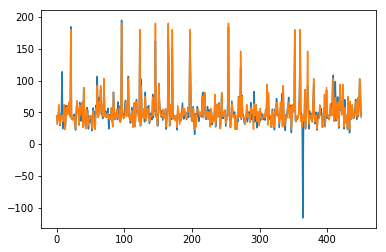

In [57]:
reg = LinearRegression(normalize =False)
cross = cross_val_score(reg, features, pm, scoring ='neg_mean_squared_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.2, random_state =42)

reg.fit(x_train, y_train)

pred = reg.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_squared_error(pred, y_test)**0.5)


In [60]:
print(((-1)*cross)**0.5)

[ 45.08006047  19.75489931 102.21734369]


In [61]:
shape = np.shape(pred)

pred = np.reshape(pred, shape)
y_test = np.reshape(y_test, shape)
result = np.hstack((pred, y_test))
print(result)


[[  44.34194305   43.5       ]
 [  36.7055977    31.09      ]
 [  40.50551491   40.84      ]
 [  49.85384004   62.        ]
 [  40.59551646   39.        ]
 [  29.42045567   31.09      ]
 [  44.18798877   43.        ]
 [  50.40338093   45.6       ]
 [ 113.72154942   44.8       ]
 [  24.20651861   35.77      ]
 [  51.32547693   45.        ]
 [  56.57049934   62.        ]
 [  24.29785568   23.        ]
 [  27.74701153   27.12      ]
 [  60.93954022   54.1       ]
 [  55.27810514   58.6       ]
 [  59.77448024   46.27      ]
 [  49.90154459   51.        ]
 [  49.08168719   66.        ]
 [  49.12428474   46.        ]
 [  43.22758148   43.        ]
 [ 184.39624731  180.        ]
 [  39.78911532   39.        ]
 [  41.09798276   43.5       ]
 [  41.21149881   37.74      ]
 [  41.99982198   43.3       ]
 [  46.99307729   42.5       ]
 [  28.73803816   29.15      ]
 [  22.11837314   24.        ]
 [  47.51051098   56.85      ]
 [  67.74219939   67.24      ]
 [  52.06933682   50.9       ]
 [  51.2

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

14.266608405425243


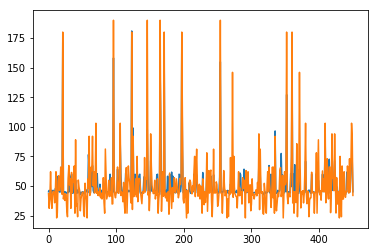

In [63]:
reg = RandomForestRegressor(max_depth=3) 
cross = cross_val_score(reg, features, pm, scoring ='neg_mean_squared_error',cv=3)
x_train, x_test, y_train, y_test = train_test_split(features, pm, test_size =0.2, random_state =42)

reg.fit(x_train, y_train)

pred = reg.predict(x_test)

plt.plot(pred)
plt.plot(y_test)

print(mean_squared_error(pred, y_test)**0.5)


In [64]:
print(((-1)*cross)**0.5)

[42.04560484 26.71832404 47.8364199 ]


In [69]:

for i in range(0,len(pred)):
  print(str(y_test[i]) +'\t'+ str(pred[i]))


43.5	45.09841293265651
31.09	46.29048874230133
40.84	44.75203347614693
62.0	44.31456221669749
39.0	43.76173955020084
31.09	46.29048874230133
43.0	45.09841293265651
45.6	46.29048874230133
44.8	44.31456221669749
35.77	43.76173955020084
45.0	47.84870800678304
62.0	45.50663802634231
23.0	43.416130949680465
27.12	43.76173955020084
54.1	58.22687948874618
58.6	46.29048874230133
46.27	45.09841293265651
51.0	44.75203347614693
66.0	60.42216229910174
46.0	59.418955298391005
43.0	45.09841293265651
180.0	171.41226643531905
39.0	44.31456221669749
43.5	45.09841293265651
37.74	43.76173955020084
43.3	45.09841293265651
42.5	44.31456221669749
29.15	43.76173955020084
24.0	44.75203347614693
56.85	44.31456221669749
67.24	59.90883039411965
50.9	45.09841293265651
56.0	58.22687948874618
31.09	42.63228023372144
61.42	59.90883039411965
44.3	44.31456221669749
54.78	43.76173955020084
53.45	45.09841293265651
66.88	59.90883039411965
27.0	44.54559026615986
89.0	54.71343592275893
32.81	43.76173955020084
35.0	43.761739

In [0]:
def transmission(img, lt = 230, retMean = False):
  ker = np.ones((3, 3))/9.0
  imgrgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  b, g, r = cv2.split(img)
  hsv = cv2.cvtColor(imgrgb, cv2.COLOR_RGB2HSV)
  _, _, v = cv2.split(hsv)
  v_blur = cv2.filter2D(v, -1, ker)
  _,building_mask = cv2.threshold(v_blur, lt, 255, cv2.THRESH_BINARY)
  sky = cv2.bitwise_and(imgrgb, imgrgb, mask = building_mask)
  sky_mask = cv2.bitwise_not(building_mask, building_mask.copy())
  building = cv2.bitwise_and(imgrgb, imgrgb, mask = sky_mask)
 
  al = max(v_blur.flatten())
  #Airlight Found. Now calculate Transmission Map
  img_norm = img/float(al)
  b, g, r = cv2.split(img_norm)
  kernel = np.ones((3,3),np.uint8)
  im_new = np.zeros((img.shape[0], img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      im_new[i][j] = min(b[i][j], g[i][j], r[i][j])
  dcp = cv2.erode(im_new, kernel, iterations = 1)
  #ax[3].imshow(im_new, cmap = 'gray')
  #ax[4].imshow(dcp, cmap = 'gray')
  tr = np.ones((dcp.shape[0], dcp.shape[1]))
  for i in range(dcp.shape[0]):
    for j in range(dcp.shape[1]):
      tr[i][j] = 1 - dcp[i][j]
  #ax[1].imshow(tr, cmap = 'gray')
  if retMean == False:
    return tr
  elif retMean == True:
    return np.mean(tr)

In [0]:
def entropy(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  hist = cv2.calcHist( [image.astype('float32')],
              [0], 
              None,
               [256], 
              [0,256] )
  h_norm = 0
  h_norm = cv2.normalize(hist, h_norm)
  ent = 0
  for p in h_norm:
    try:
      ent += p*math.log(p, 2)
    except:
      pass
    
  return (-1 * ent[0])

In [0]:
def contrast(image):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  s = 0
  ss = 0
  mean = np.mean(image)
  x = (-1 * mean * (np.ones(image.shape)))
  ss = np.square(np.add(image, x))
  cont = np.sqrt(np.sum(ss)/float(image.size))
  return cont